# This jupyter notebook is prepared by Brandon Gibbons

#1. Load Data and perform basic EDA

##I. Import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn (1 pt)

In [376]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import scipy.stats as st
from sklearn import ensemble
from sklearn.model_selection import train_test_split

##II.  Import the data to a dataframe and show the count of rows and columns (1 pt)


In [377]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/hrdata2.csv")
data.shape

(8955, 15)

##III. Show the top 5 and last 5 rows (1 pt)


In [378]:
data.head()

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0


In [379]:
data.tail()

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
8950,19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1.0,100-500,Pvt Ltd,1,52,1.0
8951,19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9.0,50-99,Pvt Ltd,1,36,1.0
8952,19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10.0,100-500,Public Sector,3,23,0.0
8953,19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7.0,10/49,Funded Startup,1,25,0.0
8954,19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,50-99,Pvt Ltd,4,44,0.0


##IV. Show how many columns have null values


In [380]:
percentage = data.isnull().mean()
percentage = percentage.to_frame('nulls')
percentage.sort_values('nulls', inplace=True, ascending=False)
percentage

,nulls
Unnamed: 0,0.0
enrollee_id,0.0
city,0.0
city_development_index,0.0
gender,0.0
relevent_experience,0.0
enrolled_university,0.0
education_level,0.0
major_discipline,0.0
experience,0.0


##V. Plot the count of target and discuss its imbalances and probable issues and solutions

###There is alot more records where the applicant is not looking for a job change. This could make it difficult to teach the model examples where the applicant is actually a good fit.

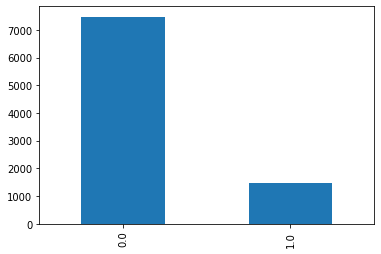

In [381]:
target = data['target']
target.value_counts().plot(kind='bar')
plt.show()

#2.   Feature Selection and Pre-processing 

##I. Preprocessing City:

###I. Plot number of records per city so that the highest city counts are shown in descending *order*

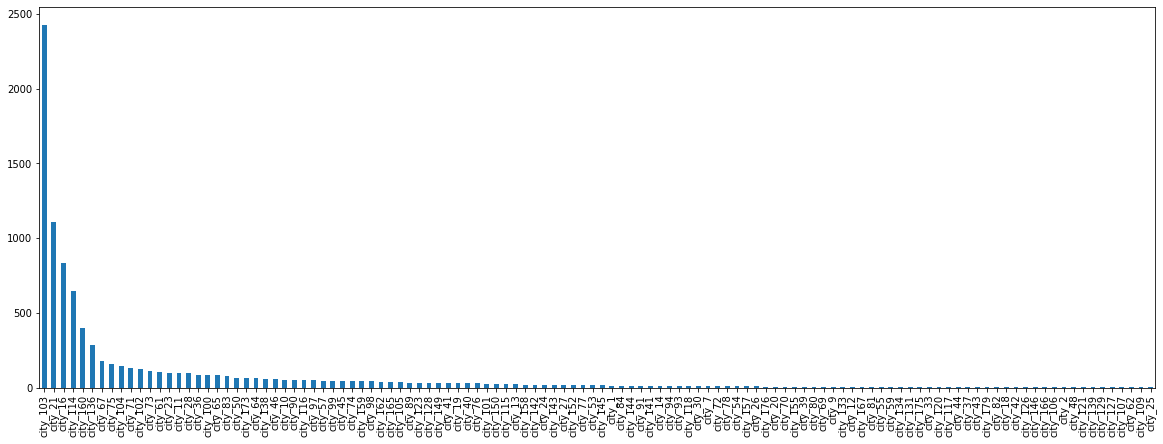

In [382]:
cities = data['city']
plt.figure(figsize=(20,7))
cities.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

###II. How many rows belong to the count-wise top 4 cities in total and how many for the remaining? (The plot you have generated in 2.i.i should help you to identify those cities)

In [383]:
top_cities = cities.value_counts().sort_values(ascending=False).nlargest(4)

print(top_cities)
print("Top 4 cities count: " + str(top_cities.sum()))

city_103    2426
city_21     1111
city_16      836
city_114     648
Name: city, dtype: int64
Top 4 cities count: 5021


In [384]:
bottom_cities = cities.value_counts().sort_values(ascending=True).nsmallest(112)
print(bottom_cities)
print("Bottom 112 cities count: " + str(bottom_cities.sum()))

city_25       1
city_121      1
city_139      1
city_129      1
city_109      1
           ... 
city_104    146
city_75     156
city_67     179
city_136    288
city_160    401
Name: city, Length: 112, dtype: int64
Bottom 112 cities count: 3934


###III. Replace the city name with city_others if the city name is not within the top 4 city names.

In [385]:
bottom_cities = bottom_cities.to_dict()
data.loc[data['city'].isin(bottom_cities), 'city'] = 'city_others'

###IV. Show some sample data that the records have changed appropriately

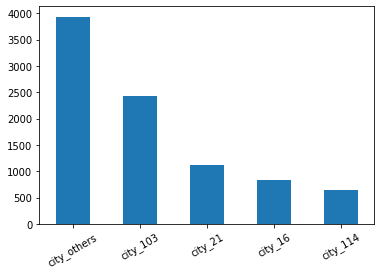

In [386]:
data['city'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=30)
plt.show()

In [387]:
data.head()

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_others,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,4,666,city_others,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,7,402,city_others,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0


##II. Education Level:

###I. Show the unique values of education level.

['Graduate' 'Masters' 'Phd']


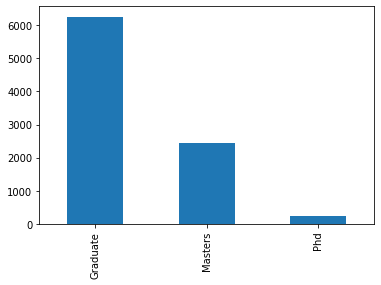

In [388]:
education = data['education_level'].unique()
print(education)

data['education_level'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()

###II. Replace the value of Education level column like ordinal values, "Graduate" -> 0, Masters->1, and Phd -> 2 

In [389]:
education_types = {"education_level": {"Graduate":0,
                                      "Masters":1,
                                      "Phd":2}}
data = data.replace(education_types)
data

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_others,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,4,666,city_others,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,7,402,city_others,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,19147,21319,city_21,0.624,Male,No relevent experience,Full time course,0,STEM,1.0,100-500,Pvt Ltd,1,52,1.0
8951,19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,1,STEM,9.0,50-99,Pvt Ltd,1,36,1.0
8952,19150,32313,city_others,0.920,Female,Has relevent experience,no_enrollment,0,STEM,10.0,100-500,Public Sector,3,23,0.0
8953,19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,0,Humanities,7.0,10/49,Funded Startup,1,25,0.0


###III. Show some sample data that the records have changed appropriately


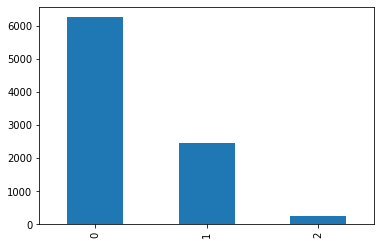

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_others,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,4,666,city_others,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,7,402,city_others,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0
5,12,25619,city_others,0.913,Male,Has relevent experience,no_enrollment,0,STEM,21.0,1000-4999,Pvt Ltd,3,23,0.0
6,15,6588,city_114,0.926,Male,Has relevent experience,no_enrollment,0,STEM,16.0,10/49,Pvt Ltd,>4,18,0.0
7,20,31972,city_others,0.843,Male,Has relevent experience,no_enrollment,1,STEM,11.0,100-500,Pvt Ltd,1,68,0.0
8,21,19061,city_114,0.926,Male,Has relevent experience,no_enrollment,1,STEM,11.0,100-500,Pvt Ltd,2,50,0.0
9,23,7041,city_others,0.776,Male,Has relevent experience,no_enrollment,0,Humanities,0.0,1000-4999,Pvt Ltd,1,65,0.0


In [390]:
data['education_level'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()
data.head(10)

##III. company_size column

###I. Show the unique values of the company_size column


['50-99' '<10' '5000-9999' '1000-4999' '10/49' '100-500' '10000+'
 '500-999']


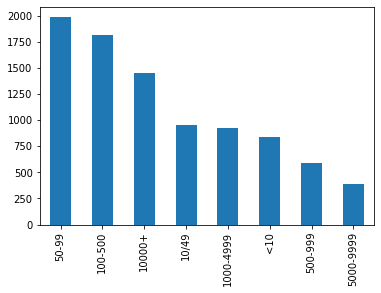

In [391]:
company_sz = data['company_size'].unique()
print(company_sz)

data['company_size'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()

###II. Change the values of the company_size column from 0 to 7 where e0 is <10 and 7 is 10000+. The order of the numbers should be based on the values of the column-like an ordinary variable. 

In [392]:
company_sz_cat = {"company_size" : {"<10": 0,
                                    "10/49": 1,
                                    "50-99": 2,
                                    "100-500": 3,
                                    "500-999": 4,
                                    "1000-4999": 5,
                                    "5000-9999": 6,
                                    "10000+": 7}}
data = data.replace(company_sz_cat)

###III. Show the updated unique values


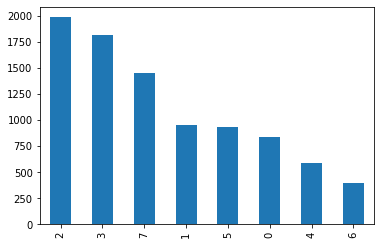

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_others,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,2,Pvt Ltd,>4,47,0.0
1,4,666,city_others,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,2,Funded Startup,4,8,0.0
2,7,402,city_others,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,0,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,2,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,6,Pvt Ltd,1,108,0.0
5,12,25619,city_others,0.913,Male,Has relevent experience,no_enrollment,0,STEM,21.0,5,Pvt Ltd,3,23,0.0
6,15,6588,city_114,0.926,Male,Has relevent experience,no_enrollment,0,STEM,16.0,1,Pvt Ltd,>4,18,0.0
7,20,31972,city_others,0.843,Male,Has relevent experience,no_enrollment,1,STEM,11.0,3,Pvt Ltd,1,68,0.0
8,21,19061,city_114,0.926,Male,Has relevent experience,no_enrollment,1,STEM,11.0,3,Pvt Ltd,2,50,0.0
9,23,7041,city_others,0.776,Male,Has relevent experience,no_enrollment,0,Humanities,0.0,5,Pvt Ltd,1,65,0.0


In [393]:
data['company_size'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()
data.head(10)

##IV. Last_new_job

###I. Show the unique values of the last_new_job column


['>4' '4' '1' '3' '2' 'never']


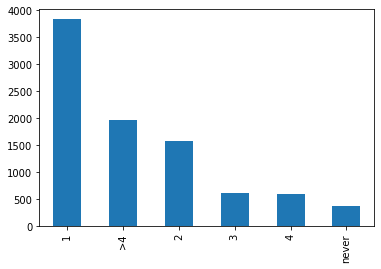

In [394]:
last_job = data['last_new_job'].unique()
print(last_job)

data['last_new_job'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()

###II. Convert the values of this column to never->0, 1->1,....>4 -->5

In [395]:
last_job_cats = {'last_new_job': {'never': 0,
                                  '1': 1,
                                  '2': 2,
                                  '3': 3,
                                  '4': 4,
                                  '>4': 5}}
data = data.replace(last_job_cats)

###III. Show the updated values


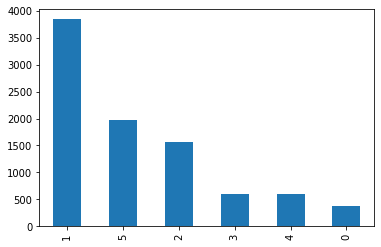

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_others,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,2,Pvt Ltd,5,47,0.0
1,4,666,city_others,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,2,Funded Startup,4,8,0.0
2,7,402,city_others,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,0,Pvt Ltd,5,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,2,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,6,Pvt Ltd,1,108,0.0
5,12,25619,city_others,0.913,Male,Has relevent experience,no_enrollment,0,STEM,21.0,5,Pvt Ltd,3,23,0.0
6,15,6588,city_114,0.926,Male,Has relevent experience,no_enrollment,0,STEM,16.0,1,Pvt Ltd,5,18,0.0
7,20,31972,city_others,0.843,Male,Has relevent experience,no_enrollment,1,STEM,11.0,3,Pvt Ltd,1,68,0.0
8,21,19061,city_114,0.926,Male,Has relevent experience,no_enrollment,1,STEM,11.0,3,Pvt Ltd,2,50,0.0
9,23,7041,city_others,0.776,Male,Has relevent experience,no_enrollment,0,Humanities,0.0,5,Pvt Ltd,1,65,0.0


In [396]:
data['last_new_job'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()
data.head(10)

##V. Other columns

###I. Show the unique values of company_type, major_descipline, enrolled_university, relevant_experience, gender, and updated city column

In [397]:
print(data['company_type'].unique())
print(data['major_discipline'].unique())
print(data['enrolled_university'].unique())
print(data['relevent_experience'].unique())
print(data['gender'].unique())
print(data['city'].unique())

['Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Public Sector' 'NGO'
 'Other']
['STEM' 'Humanities' 'Business Degree' 'Other' 'No Major' 'Arts']
['no_enrollment' 'Part time course' 'Full time course']
['No relevent experience' 'Has relevent experience']
['Male' 'Female' 'Other']
['city_others' 'city_103' 'city_114' 'city_21' 'city_16']


###II. As one-hot encoding is a bit strict, use panda's get_dummies function to create binary columns for the values of the following columns:


####company_tye, major_descipline, enrolled_university, relevant_eperience, gender, updated city column

In [398]:
data = pd.get_dummies(data, columns=['company_type', 'major_discipline', 'enrolled_university', 'relevent_experience', 'gender', 'city'])
data.head()

,Unnamed: 0,enrollee_id,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,gender_Female,gender_Male,gender_Other,city_city_103,city_city_114,city_city_16,city_city_21,city_city_others
0,1,29725,0.776,0,15.0,2,5,47,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1
1,4,666,0.767,1,21.0,2,4,8,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1
2,7,402,0.762,0,13.0,0,5,18,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1
3,8,27107,0.920,0,7.0,2,1,46,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0
4,11,23853,0.920,0,5.0,6,1,108,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0


###III. SHow the top 5 and last 5 rows to show that the table has changed [You must set this first before showing the data frame as many columns will be hidden due to the large number of columns: pd.set_option('display.max_columns', None)

In [399]:
pd.set_option('display.max_columns', None)
print(data.head())
print(data.tail())

   Unnamed: 0  enrollee_id  city_development_index  education_level  \
0           1        29725                   0.776                0   
1           4          666                   0.767                1   
2           7          402                   0.762                0   
3           8        27107                   0.920                0   
4          11        23853                   0.920                0   

   experience  company_size  last_new_job  training_hours  target  \
0        15.0             2             5              47     0.0   
1        21.0             2             4               8     0.0   
2        13.0             0             5              18     1.0   
3         7.0             2             1              46     1.0   
4         5.0             6             1             108     0.0   

   company_type_Early Stage Startup  company_type_Funded Startup  \
0                                 0                            0   
1                     

###IV. Also, show the shape of the table


In [400]:
data.shape

(8955, 34)

##VI. Drop the enrollee_id and any duplicate columns (if you have multiple city column one with actual and one with updated, then remove the actual one)

In [401]:
data = data.drop(columns=['enrollee_id'])
data = data.drop_duplicates()
data.shape

(8955, 33)

##VII. Feature scaling:

###I. Use sklearn.preprocessing's MinMaxScaler to perform min max scaling to all the columns (see documentation on how to use it)

In [402]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

data

,Unnamed: 0,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,gender_Female,gender_Male,gender_Other,city_city_103,city_city_114,city_city_16,city_city_21,city_city_others
0,0.000000,0.654691,0.0,0.714286,0.285714,1.0,0.137313,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000157,0.636727,0.5,1.000000,0.285714,0.8,0.020896,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000313,0.626747,0.0,0.619048,0.000000,1.0,0.050746,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000365,0.942116,0.0,0.333333,0.285714,0.2,0.134328,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000522,0.942116,0.0,0.238095,0.857143,0.2,0.319403,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,0.999582,0.351297,0.0,0.047619,0.428571,0.2,0.152239,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8951,0.999687,0.942116,0.5,0.428571,0.285714,0.2,0.104478,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8952,0.999739,0.942116,0.0,0.476190,0.428571,0.6,0.065672,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8953,0.999843,0.942116,0.0,0.333333,0.142857,0.2,0.071642,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


##VIII. Move the target column to the last column of the data frame and show that it has changed

In [403]:
data = data[[c for c in data if c not in ['target']] 
       + ['target']]
data

,Unnamed: 0,city_development_index,education_level,experience,company_size,last_new_job,training_hours,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,gender_Female,gender_Male,gender_Other,city_city_103,city_city_114,city_city_16,city_city_21,city_city_others,target
0,0.000000,0.654691,0.0,0.714286,0.285714,1.0,0.137313,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000157,0.636727,0.5,1.000000,0.285714,0.8,0.020896,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000313,0.626747,0.0,0.619048,0.000000,1.0,0.050746,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.000365,0.942116,0.0,0.333333,0.285714,0.2,0.134328,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000522,0.942116,0.0,0.238095,0.857143,0.2,0.319403,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,0.999582,0.351297,0.0,0.047619,0.428571,0.2,0.152239,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8951,0.999687,0.942116,0.5,0.428571,0.285714,0.2,0.104478,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8952,0.999739,0.942116,0.0,0.476190,0.428571,0.6,0.065672,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8953,0.999843,0.942116,0.0,0.333333,0.142857,0.2,0.071642,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#3. X/Y and Training/Test Split with stratified sampling and SMOTE

##I. Copy all the features into X and the target to Y

In [404]:
X = data.drop(columns=['target']).values
y = data['target'].values

##II. Show the ratio of 1 and 0 in Y

In [405]:
print('y ratio: ' + str(y.sum() / (y.shape[0] - y.sum()) ))

y ratio: 0.19847430406852248


##III. Use sklearn's train_test_split to split the data set into training and test sets. There should be 30% records in the test set. The random_stat should be 0. As we want to have the same ratio of 0 and 1 in the test set, use the stratify parameter to the Y.  

In [406]:
X_train_ub, X_test, y_train_ub, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

##IV. Show the ratio of 1 and 0 in y_train and then y_test


In [407]:
print('y_train ratio: ' + str(y_train_ub.sum() / (y_train_ub.shape[0] - y_train_ub.sum()) ))
print('y_test ratio: ' + str(y_test.sum() / (y_test.shape[0] - y_test.sum()) ))


y_train ratio: 0.19847036328871892
y_test ratio: 0.19848349687778769


##V. Rebalance

###I. Use imblearn's SMOTE to balance the x_train 

In [408]:
from imblearn.over_sampling import SMOTE, ADASYN
X_train, y_train = SMOTE().fit_resample(X_train_ub, y_train_ub)


##VI. Show the ratio of 0 and 1 in Y_train after rebalancing. (do you have 50% of each class now?)

In [409]:
print('y_train ratio: ' + str(y_train.sum() / (y_train.shape[0] - y_train.sum()) ))

y_train ratio: 1.0


#4. PCA and Logistic Regression

##I. As we have many features now, we would like to do principal component analysis (you have learned it in datacamp). As part of it, create pipeline to find how many dimensions give you the best logistic regression model. 

>1 0.671 (0.015)
>2 0.686 (0.013)
>3 0.687 (0.014)
>4 0.690 (0.014)
>5 0.700 (0.012)
>6 0.701 (0.013)
>7 0.704 (0.013)
>8 0.720 (0.012)
>9 0.722 (0.012)
>10 0.725 (0.011)
>11 0.728 (0.011)
>12 0.727 (0.012)
>13 0.726 (0.012)
>14 0.726 (0.012)
>15 0.726 (0.012)
>16 0.727 (0.012)
>17 0.725 (0.012)
>18 0.724 (0.013)
>19 0.724 (0.013)
>20 0.723 (0.013)
>21 0.728 (0.013)
>22 0.729 (0.013)
>23 0.729 (0.012)
>24 0.729 (0.013)
>25 0.728 (0.013)
>26 0.728 (0.013)
>27 0.728 (0.013)
>28 0.728 (0.013)
>29 0.728 (0.013)
>30 0.728 (0.013)
>31 0.728 (0.013)


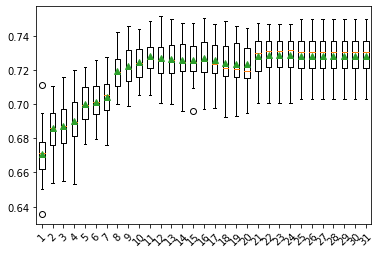

In [410]:
# compare pca number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,32):
		steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()

##II. Based on the number of features chosen in the above step, use the test set to evaluate the model for accuracy (the code right after the plot can give you an idea about it.). Use sklearn.metrics import accuracy_score for accuracy (the google colab link in the classification module should help with it)

In [427]:
from sklearn.metrics import accuracy_score

steps = [("pca", PCA(n_components=12)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
model.fit(X_train, y_train)

y_pred1 = model.predict(X_test)
accuracy_score(y_test, y_pred1)

0.8388537402307406

##III. Show the confusion matrix and interpret the numbers in the confusion matrix (the google colab link in the classification module should help with it)

There are 2006 correct negatives, 236 false positives, 197 false negatives, 248 true positives

In [428]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[2006,  236],
       [ 197,  248]])

##IV. Show precision, recall, and f1 score ((the google colab link in the classification module should help with it)). Note that all of these scores should be calculated based on the test set and predicted result for the test set

In [429]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision: " + str(precision_score(y_test, y_pred1)))
print("Recall: " + str(recall_score(y_test, y_pred1)))
print("F1: " + str(f1_score(y_test, y_pred1)))


Precision: 0.512396694214876
Recall: 0.5573033707865168
F1: 0.5339074273412271


##V.  Plot ROC curve and find AUC (the same google colab link should help you)

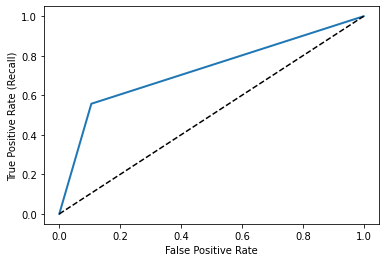

0.74889394501298

In [430]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
y_score = model.predict_proba(X_test)[:,1]

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()
roc_auc_score(y_test, y_score)

##VI. Plot precision-recall curve for different thresholds and discuss the plot


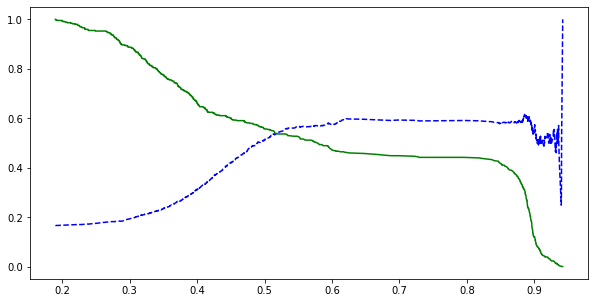

In [431]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_score)


 

plt.figure(figsize=(10,5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.show()

#5. Softmaxt regression:

##1. How softmax regression is related to logistic regression? What library can you use for softmax regression?

### Softmax regression is generalized logistic regression but is able to handle multiple classes. You can use TensorFlow for softmax regression.

#6. KNN (Always use rebalanced training set for training, if it is not specified which training set to use)


##1. Use sklearn's KNN classifier to train (with k=  10) and predict the model based on the unbalanced training set (the training set before rebalancing) and test it and show the confusion matrix and classification report

In [432]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train_ub, y_train_ub)

y_pred2 = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[2155   87]
 [ 312  133]]
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92      2242
         1.0       0.60      0.30      0.40       445

    accuracy                           0.85      2687
   macro avg       0.74      0.63      0.66      2687
weighted avg       0.83      0.85      0.83      2687



##2. Use sklearn's KNN classifier to train (with k=  10) and predict the model based on the rebalanced training set and test it and show the confusion matrix and classification report

In [417]:
classifier2 = KNeighborsClassifier(n_neighbors=10)
classifier2.fit(X_train, y_train)

y_pred3 = classifier2.predict(X_test)

print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[1699  543]
 [ 183  262]]
              precision    recall  f1-score   support

         0.0       0.90      0.76      0.82      2242
         1.0       0.33      0.59      0.42       445

    accuracy                           0.73      2687
   macro avg       0.61      0.67      0.62      2687
weighted avg       0.81      0.73      0.76      2687



##3. Use grid search to tune the following hyperparameters of KNN: number of neighbors (between 1 and 20), weights  (uniform or distance), and metrics (Euclidean, Manhattan, or Minkowski)istance) to use for KNN. While creating an instance of GridSearchCV, use multiple evaluation metrics such as AUC and accuracy based on the example available at ...

In [433]:
from sklearn.model_selection import GridSearchCV

knn_params = {
    "n_neighbors": range(1, 26, 2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "leaf_size": range(1, 40, 5)
}

knn = KNeighborsClassifier()

#grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, n_jobs=-1, cv=cv, scoring="accuracy", error_score=0)
grid_results = grid_search.fit(X_train, y_train)

##4. The above grid search process can take a couple of minutes. After completing the process, print the best_params_

In [434]:
print(grid_results.best_params_)

{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


##5. Based on the result from grid search, use the parameters to train a model, test it with test set, and then print the confusion matrix and classification report. Also, show the AUC of ROC.

              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      2242
         1.0       0.35      0.42      0.38       445

    accuracy                           0.77      2687
   macro avg       0.61      0.63      0.62      2687
weighted avg       0.79      0.77      0.78      2687

[[1893  349]
 [ 259  186]]
{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


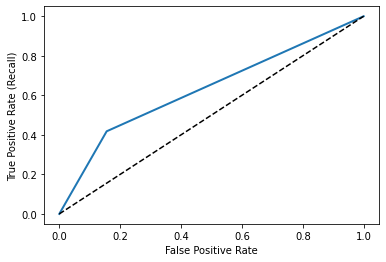

0.6311564714490472

In [436]:
final_model = knn.set_params(**grid_results.best_params_)
final_model.fit(X_train, y_train)
y_pred4 = final_model.predict(X_test)

#summarize results
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print(grid_results.best_params_)

fpr, tpr, thresholds = roc_curve(y_test, y_pred4)
y_score2 = final_model.predict_proba(X_test)[:,1]

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()
roc_auc_score(y_test, y_score2)

##6. Use PCA and based on that train model, test it and then print the confusion matrix and classification report. Also, show the AUC of ROC.

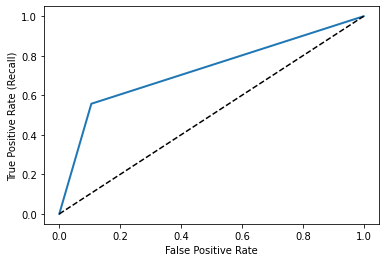

0.7488819172287986

In [437]:
steps = [("pca", PCA(n_components=12)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
model.fit(X_train, y_train)

y_pred5 = model.predict(X_test)
accuracy_score(y_test, y_pred5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred5)
y_score3 = model.predict_proba(X_test)[:,1]

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()
roc_auc_score(y_test, y_score3)

##7. A short discussion on the 4 models and their differences.

### The unbalanced set actually preformed better than the balanced set on KNN. 

#7. Naive Bayes

##1. Train a model with GaussianNB, test it and then print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

0.5135839225902493
              precision    recall  f1-score   support

         0.0       0.91      0.46      0.61      2242
         1.0       0.22      0.77      0.34       445

    accuracy                           0.51      2687
   macro avg       0.57      0.62      0.48      2687
weighted avg       0.80      0.51      0.57      2687

[[1038 1204]
 [ 103  342]]
Misclassification: 1307


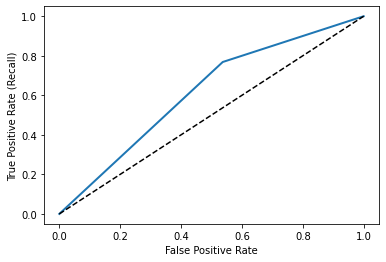

0.7255881085307059

In [438]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred6 = nb.predict(X_test)
count_misclassified_gnb = (y_test != y_pred6).sum()

print(accuracy_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))
print(confusion_matrix(y_test, y_pred6))
print('Misclassification: ' + str(count_misclassified_gnb))

fpr, tpr, thresholds = roc_curve(y_test, y_pred6)
y_score4 = nb.predict_proba(X_test)[:,1]

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()
roc_auc_score(y_test, y_score4)

##2. Train a model with CategoricalNB, test it and then print the confusion matrix and classification report. Also, plot ROC curve, and show the AUC of ROC and the count of the number of misclassification.

0.8034983252698177
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      2242
         1.0       0.43      0.53      0.47       445

    accuracy                           0.80      2687
   macro avg       0.66      0.69      0.68      2687
weighted avg       0.82      0.80      0.81      2687

[[1923  319]
 [ 209  236]]
Misclassification: 528


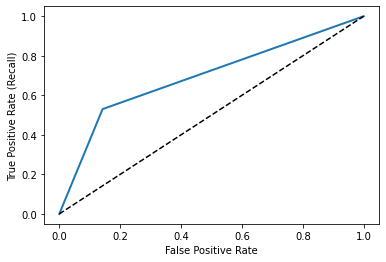

0.7255881085307059

In [446]:
from sklearn.naive_bayes import CategoricalNB

cnb = CategoricalNB()
cnb.fit(X_train, y_train)

y_pred_cnb = cnb.predict(X_test)
y_proba_pred_cnb = cnb.predict_proba(X_test)

count_misclassified = (y_test != y_pred_cnb).sum()

print(accuracy_score(y_test, y_pred_cnb))
print(classification_report(y_test, y_pred_cnb))
print(confusion_matrix(y_test, y_pred_cnb))
print('Misclassification: ' + str(count_misclassified))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_cnb)
y_proba_pred_cnb = nb.predict_proba(X_test)[:,1]

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()
roc_auc_score(y_test, y_proba_pred_cnb)

#8. Support Vector Machine

##1. Build a support vector machine model using SVC. Use grid search to tune some parameters and then based on that show the best parameters found

In [444]:
from sklearn.svm import SVC

param_grid = {'C': [1, 10, 100], 'gamma': [1,0.1,0.01,0.0001]}

gs = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=3, cv=3, n_jobs=-1)
gs.fit(X_train, y_train)

print(gs.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'C': 100, 'gamma': 1}


##2. Test the model and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

[[1893  349]
 [ 247  198]]
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      2242
         1.0       0.36      0.44      0.40       445

    accuracy                           0.78      2687
   macro avg       0.62      0.64      0.63      2687
weighted avg       0.80      0.78      0.79      2687

Misclassified: 596


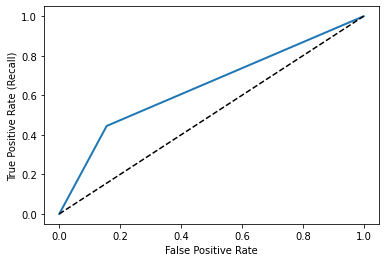

0.6670589060730286

In [445]:
y_pred_svc = gs.predict(X_test)
y_proba_svc = gs.predict_proba(X_test)[:,1]
count_misclassified_svc = (y_test != y_pred_svc).sum()

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))
print("Misclassified: " + str(count_misclassified_svc))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()
roc_auc_score(y_test, y_proba_svc)


#9. Decision Tree

##1. Build a decision tree model using sklearns DecisionTreeClassifier. Use the unbalanced training set, entropy as the criterion. Try with different max_depth (or use grid search). After building model, test it and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification. Show the decision tree. (you can simply import tree from sklearn and call tree.plot_tree with your model and the call plt.show. At the beginning of this process, use plt.figure to change the figsize)

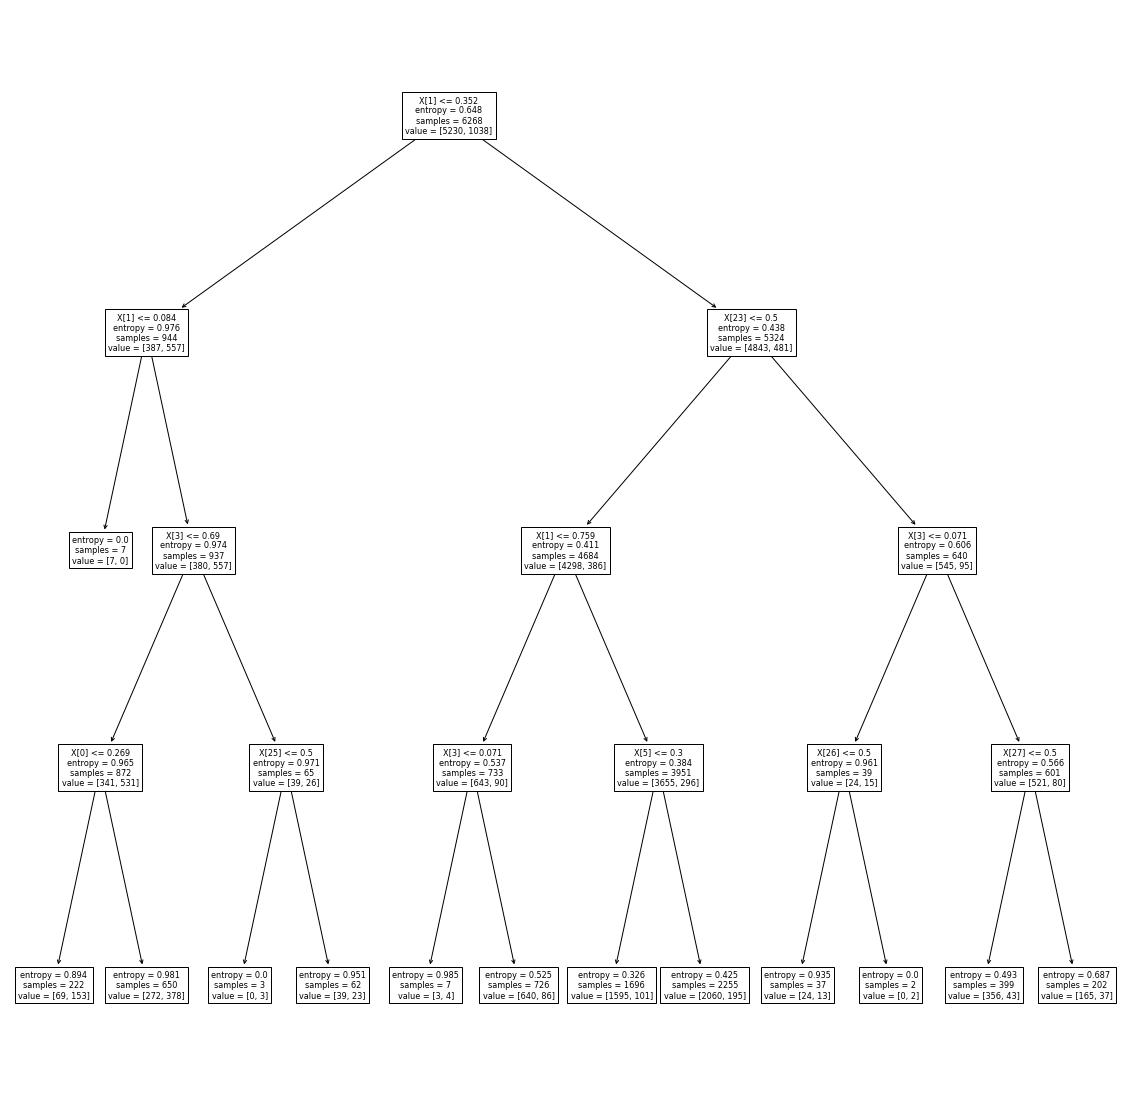

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      2242
         1.0       0.58      0.50      0.54       445

    accuracy                           0.86      2687
   macro avg       0.74      0.71      0.73      2687
weighted avg       0.85      0.86      0.85      2687

[[2080  162]
 [ 223  222]]
Misclassified: 385


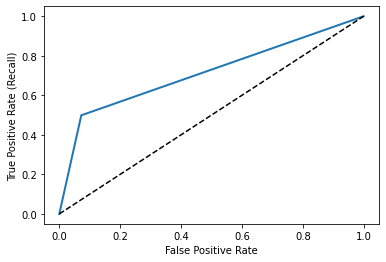

0.7456740069560686

In [447]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

tree_clfu = DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree_clfu.fit(X_train_ub, y_train_ub)
y_pred_treeu = tree_clfu.predict(X_test)
y_proba_treeu = tree_clfu.predict_proba(X_test)[:,1]
count_misclassified_u = (y_test != y_pred_treeu).sum()

plt.figure(figsize = (20,20))
tree.plot_tree(tree_clfu)
plt.show()

print(classification_report(y_test, y_pred_treeu))
print(confusion_matrix(y_test, y_pred_treeu))
print("Misclassified: " + str(count_misclassified_u))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_treeu)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()
roc_auc_score(y_test, y_proba_treeu)

##2. Perform the same tasks as 9.1 with the balanced training set

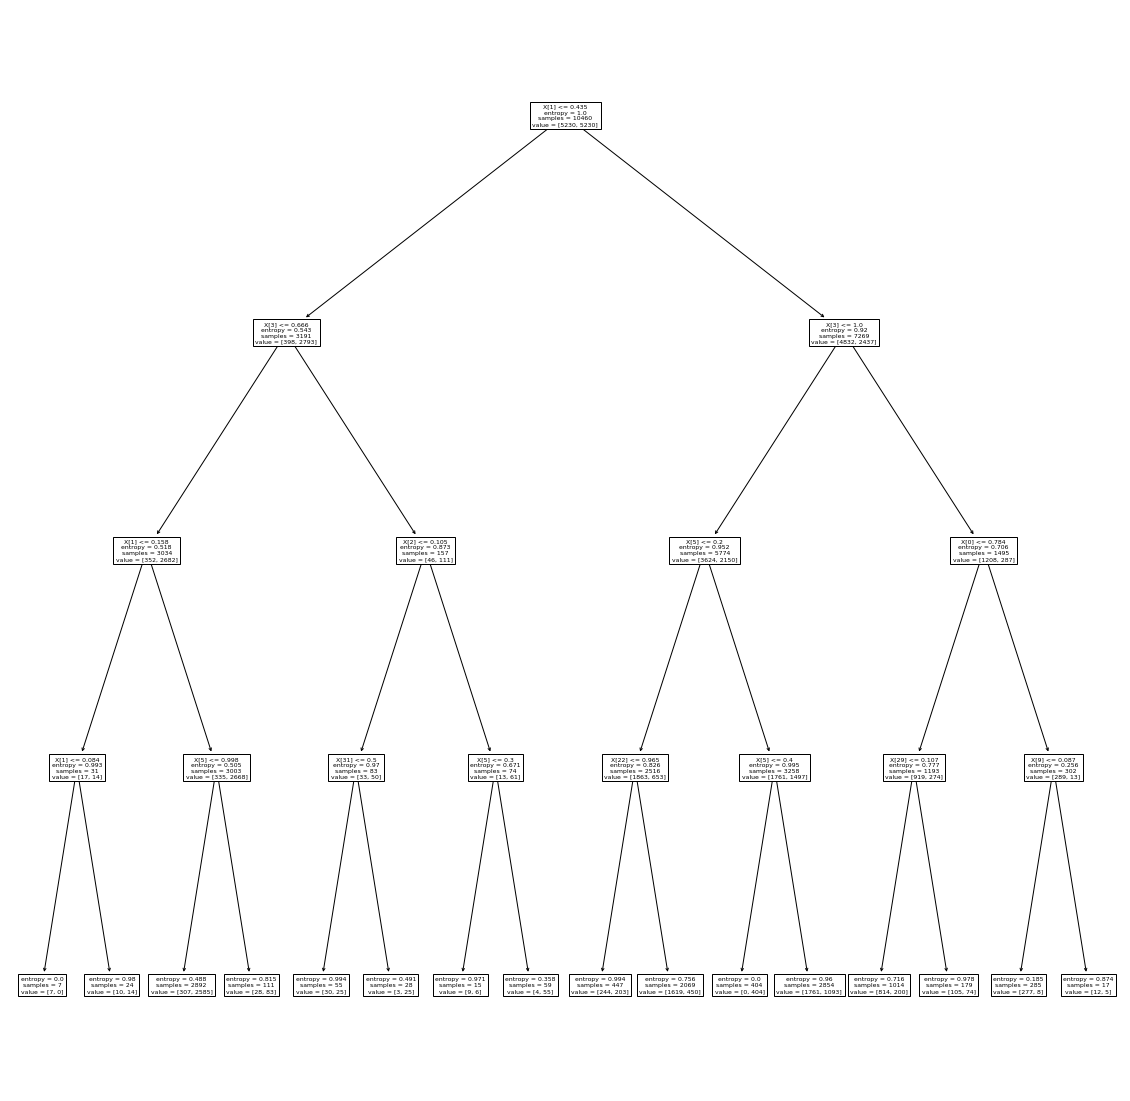

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      2242
         1.0       0.58      0.51      0.54       445

    accuracy                           0.86      2687
   macro avg       0.74      0.72      0.73      2687
weighted avg       0.85      0.86      0.85      2687

[[2079  163]
 [ 218  227]]
Misclassified: 381


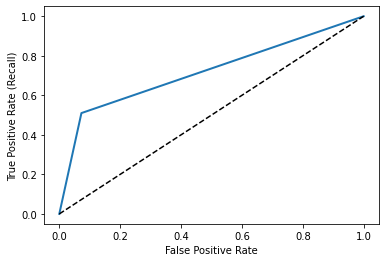

0.7445539195541702

In [448]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
y_proba_tree = tree_clf.predict_proba(X_test)[:,1]
count_misclassified_t = (y_test != y_pred_tree).sum()

plt.figure(figsize = (20,20))
tree.plot_tree(tree_clf)
plt.show()

print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print("Misclassified: " + str(count_misclassified_t))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()
roc_auc_score(y_test, y_proba_tree)

##3. Discuss any difference and also discuss part of the tree of 9.2

###The unbalanced and balanced sets performed very closely.

#10. Random Forest

##1. Use grid search to tune the max_depth, min_samples_leaf, and n_estimators

In [449]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [10,25,30]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_gs = GridSearchCV(estimator=rf, param_grid=params, cv=3, n_jobs=-1, verbose=1, scoring='accuracy')

rf_gs.fit(X_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [10, 25, 30]},
             scoring='accuracy', verbose=1)

##2. Print the best estimator

In [464]:
#rf_best = rf_gs.set_params(**rf_gs.best_params_)
rf_best = rf_gs.best_estimator_
plt.figure(figsize=(80,40))
#tree.plot_tree(rf_best)
#tree.plot_tree(rf_best)
plt.show()

<Figure size 5760x2880 with 0 Axes>

##3. Train the model. After building the model, test it and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91      2242
         1.0       0.56      0.54      0.55       445

    accuracy                           0.85      2687
   macro avg       0.74      0.73      0.73      2687
weighted avg       0.85      0.85      0.85      2687

[[2055  187]
 [ 203  242]]
Misclassified: 390


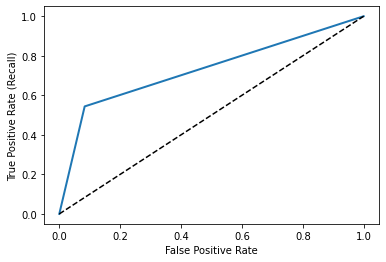

0.758006495003458

In [465]:
y_pred_rf = rf_gs.predict(X_test)
y_proba_rf = rf_gs.predict_proba(X_test)[:,1]
count_misclassified_rf = (y_test != y_pred_rf).sum()

print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print("Misclassified: " + str(count_misclassified_rf))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()
roc_auc_score(y_test, y_proba_rf)

#11. Boosting Algorithms

##1. Train an AdaBoostClassifier model with some manual/grid search-based parameters and then test it and then print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification.

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      2242
         1.0       0.31      0.39      0.35       445

    accuracy                           0.76      2687
   macro avg       0.59      0.61      0.60      2687
weighted avg       0.78      0.76      0.77      2687

[[1858  384]
 [ 270  175]]
Misclassified: 654


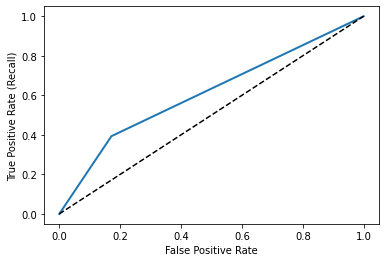

0.6109913901111569

In [476]:
from sklearn.ensemble import AdaBoostClassifier
dt = DecisionTreeClassifier()
clf = AdaBoostClassifier(n_estimators=6, base_estimator=dt, learning_rate=1)

clf.fit(X_train, y_train)
y_pred_ada = clf.predict(X_test)
y_proba_ada = clf.predict_proba(X_test)[:,1]
count_misclassified_ada = (y_test != y_pred_ada).sum()

print(classification_report(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))
print("Misclassified: " + str(count_misclassified_ada))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()
roc_auc_score(y_test, y_proba_ada)

##2. Do the same for GradientBoosting Classifier

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      2242
         1.0       0.54      0.49      0.51       445

    accuracy                           0.85      2687
   macro avg       0.72      0.70      0.71      2687
weighted avg       0.84      0.85      0.84      2687

[[2059  183]
 [ 229  216]]
Misclassified: 412


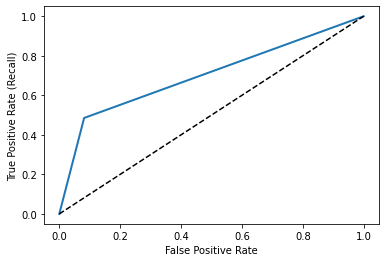

0.7291368060219107

In [470]:
from sklearn.ensemble import GradientBoostingClassifier

gclf = GradientBoostingClassifier(n_estimators=7, learning_rate=1, max_depth=4)
gclf.fit(X_train, y_train)
y_pred_gb = gclf.predict(X_test)
y_proba_gb = gclf.predict_proba(X_test)[:,1]
count_misclassified_gb = (y_test != y_pred_gb).sum()

print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
print("Misclassified: " + str(count_misclassified_gb))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()
roc_auc_score(y_test, y_proba_gb)

#12. Finally, briefly discuss your finding such as which model could be most suitable for this given scenario and what could be your future work based on this experiment.

### The best model would either be the Decision Tree or the KNN model.